In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [129]:
sns.set_style(style='darkgrid')

In [130]:
df = pd.read_csv('../data/heart.csv')

In [131]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [133]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [134]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Let's look at data pair plot

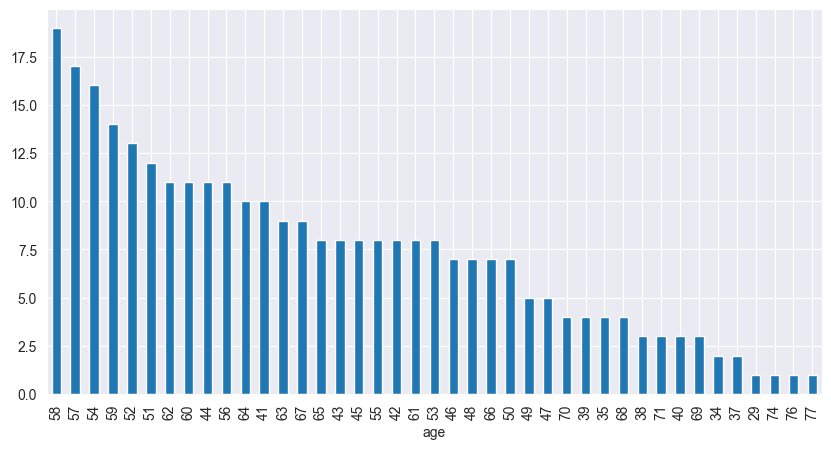

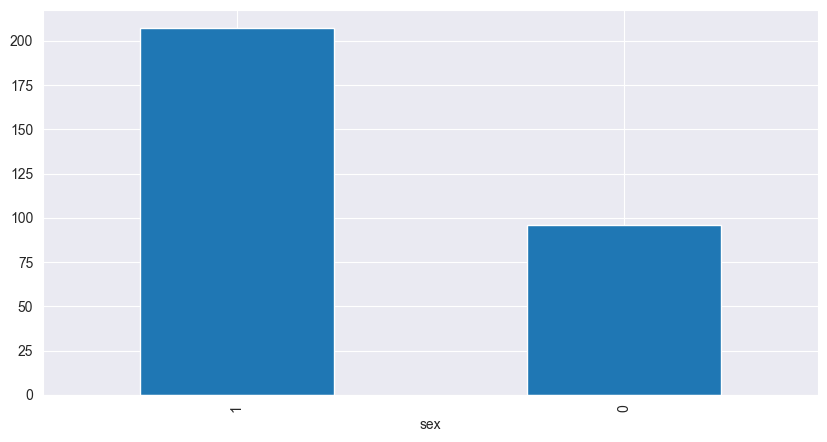

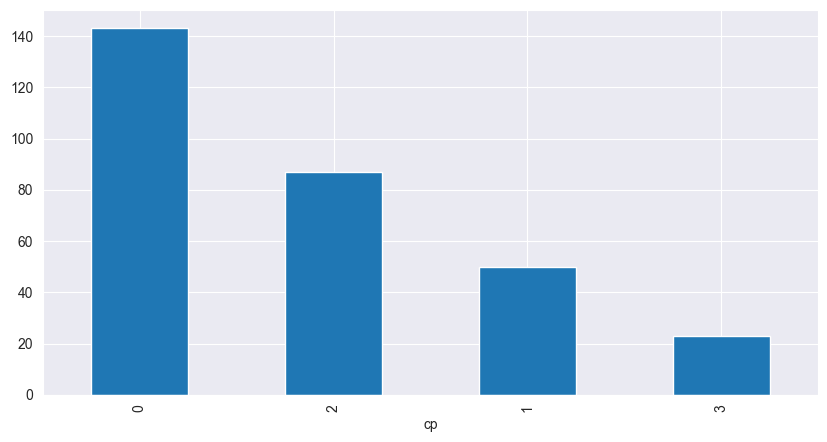

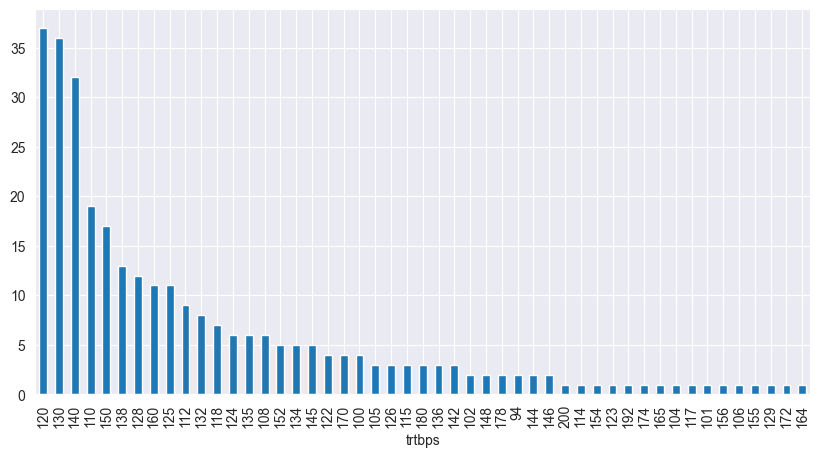

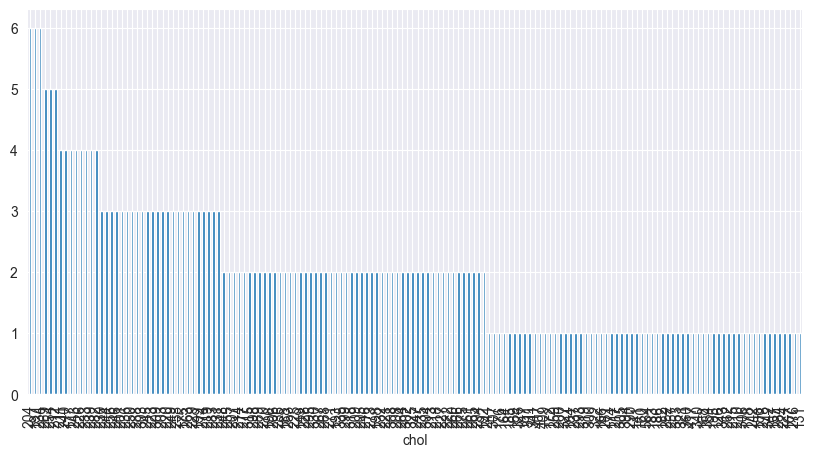

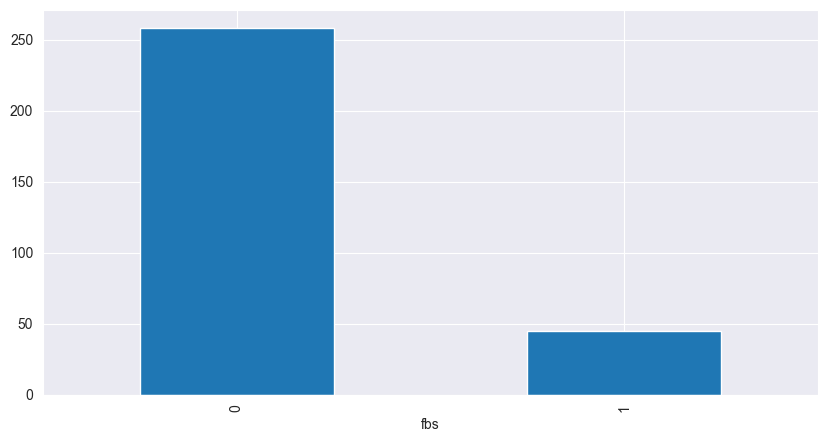

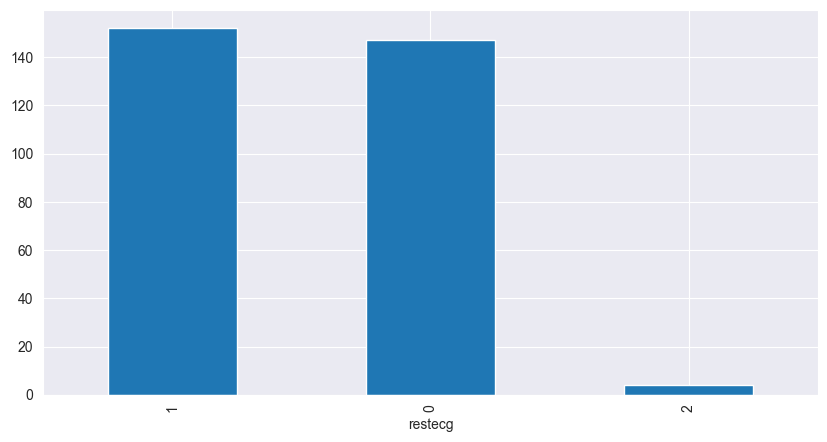

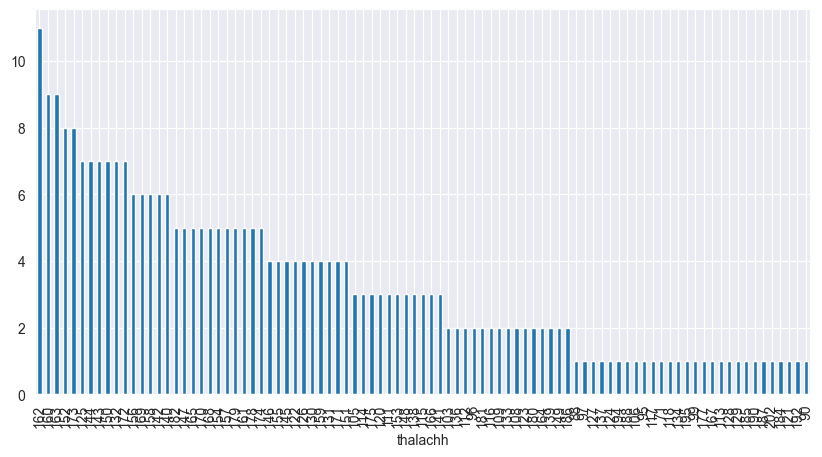

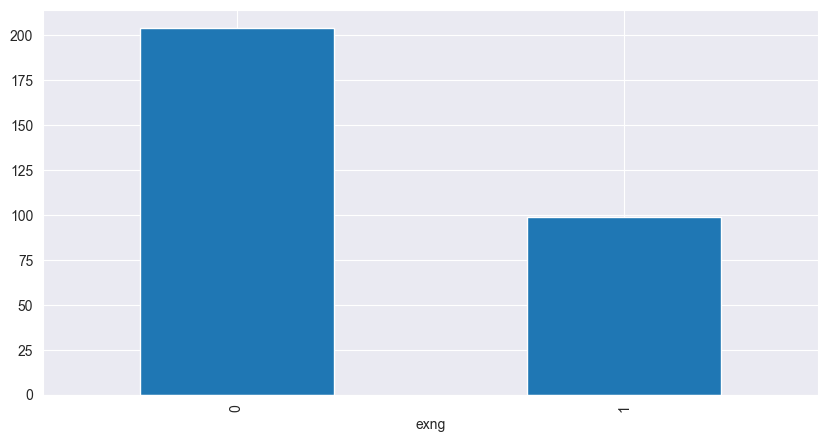

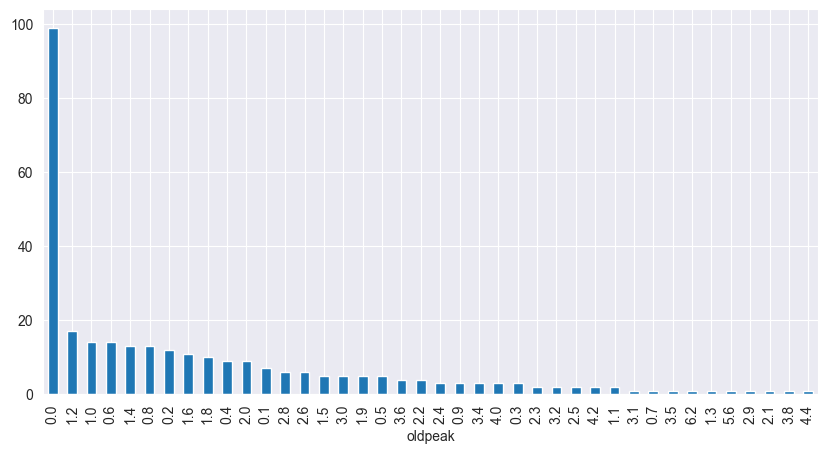

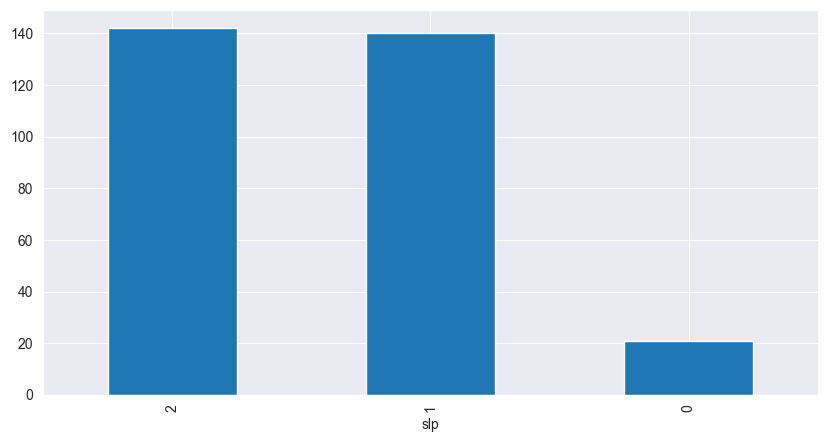

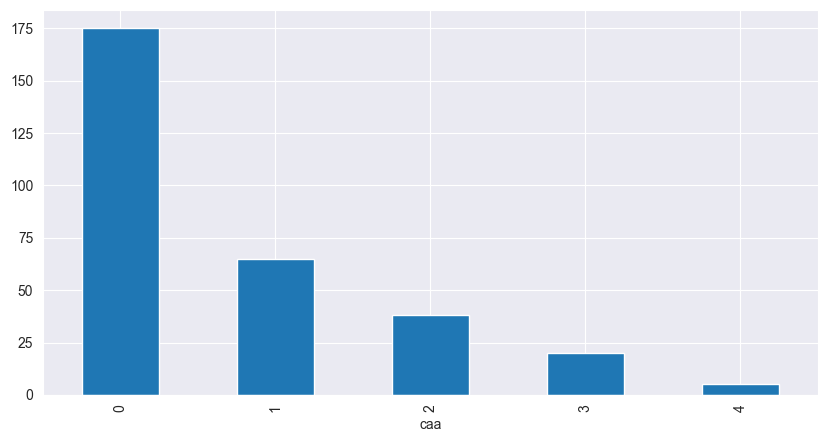

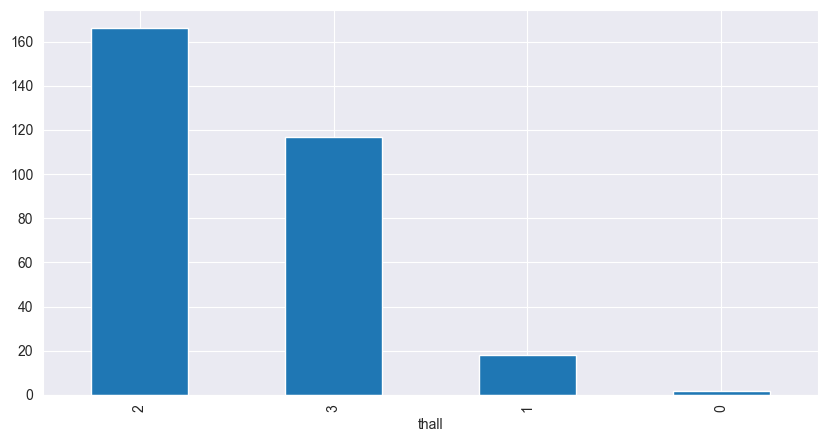

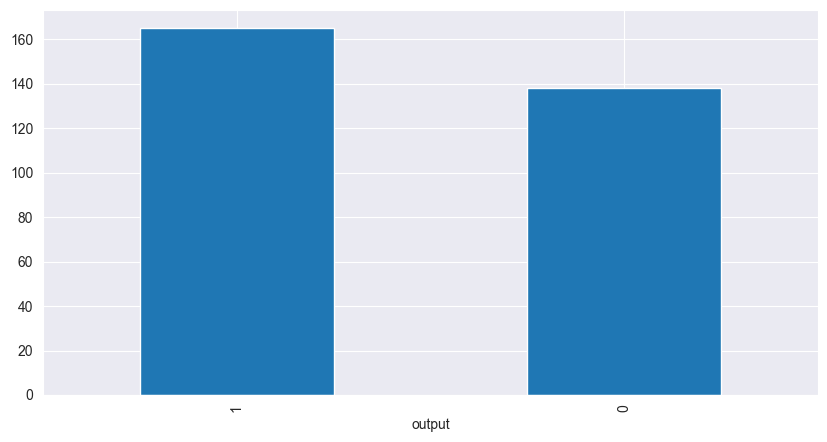

In [135]:
for column in df.columns:
    plt.figure(figsize=(10, 5))
    df[column].value_counts().plot(kind='bar')

Correlation seems to be present among different features

<Axes: >

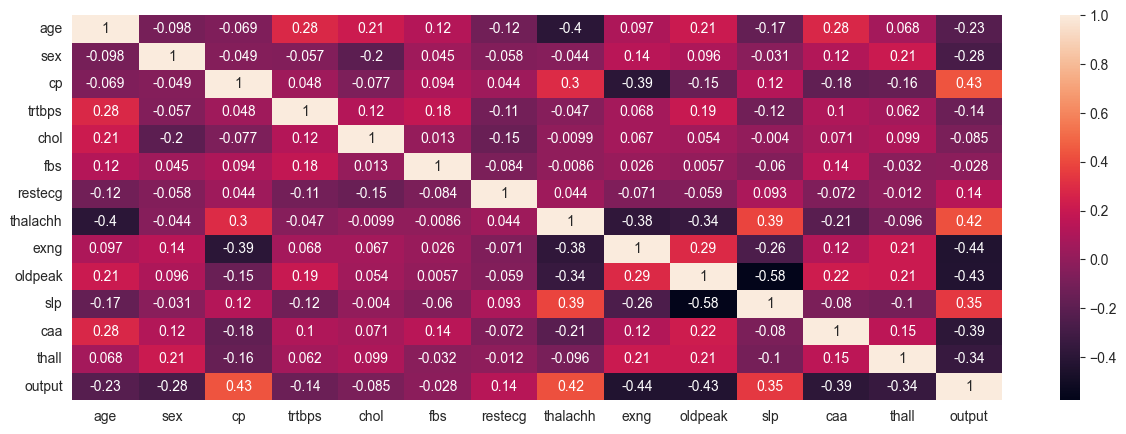

In [136]:
correlation = df.corr()
plt.figure(figsize=(15, 5))
sns.heatmap(correlation, annot=True)

In [137]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('output', axis=1), df['output'], train_size=0.77, shuffle=True, random_state=1337)

In [138]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score


def output_metrics(model, train, test):
    print("------------TRAIN SCORES------------")
    print("ROC-AUC:", roc_auc_score(y_train, model.predict(train)))
    print(classification_report(y_train, model.predict(train)))
    print("Accuracy:", accuracy_score(y_train, model.predict(train)))

    print("------------TEST SCORES------------")
    print("ROC-AUC:", roc_auc_score(y_test, model.predict(test)))
    print(classification_report(y_test, model.predict(test)))
    print("Accuracy:", accuracy_score(y_test, model.predict(test)))

In [139]:
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [140]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


log_reg = LogisticRegression(random_state=42, max_iter=2000)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=2000, random_state=42)

As expected, LogisticRegression did relatively well, since a lot of features correlate with our target

In [141]:
output_metrics(log_reg, X_train_scaled, X_test_scaled)

------------TRAIN SCORES------------
ROC-AUC: 0.8512195121951219
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       110
           1       0.83      0.90      0.87       123

    accuracy                           0.85       233
   macro avg       0.86      0.85      0.85       233
weighted avg       0.86      0.85      0.85       233

Accuracy: 0.8540772532188842
------------TEST SCORES------------
ROC-AUC: 0.8392857142857143
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        28
           1       0.85      0.93      0.89        42

    accuracy                           0.86        70
   macro avg       0.86      0.84      0.85        70
weighted avg       0.86      0.86      0.85        70

Accuracy: 0.8571428571428571


In [142]:
coefs = pd.Series(log_reg.coef_[0])
coefs

0    -0.119600
1    -0.625412
2     0.868626
3    -0.328996
4    -0.352163
5     0.153743
6     0.309845
7     0.407411
8    -0.228893
9    -0.453112
10    0.384466
11   -0.686243
12   -0.627909
dtype: float64

In [143]:
coefs = coefs.sort_values(key=lambda x: abs(x))
new_cols = df.columns[coefs[-5::].index]

In [144]:
log_reg_2 = LogisticRegression(random_state=42, max_iter=2000)
X_train_cutoff = X_train_scaled[:, coefs[-7::].index]
X_test_cutoff = X_test_scaled[:, coefs[-7::].index]
log_reg_2.fit(X_train_cutoff, y_train)

LogisticRegression(max_iter=2000, random_state=42)

It perfomed a little worse

In [145]:
output_metrics(log_reg_2, X_train_cutoff, X_test_cutoff)

------------TRAIN SCORES------------
ROC-AUC: 0.8385439763488544
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       110
           1       0.83      0.89      0.85       123

    accuracy                           0.84       233
   macro avg       0.84      0.84      0.84       233
weighted avg       0.84      0.84      0.84       233

Accuracy: 0.8412017167381974
------------TEST SCORES------------
ROC-AUC: 0.8690476190476191
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        28
           1       0.87      0.95      0.91        42

    accuracy                           0.89        70
   macro avg       0.89      0.87      0.88        70
weighted avg       0.89      0.89      0.88        70

Accuracy: 0.8857142857142857


In [146]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


decisiong_tree = GridSearchCV(DecisionTreeClassifier(),param_grid={
    "max_depth": [1, 4, 5, 6, 7, 10, 20],
    "criterion": ['entropy', 'log_loss', 'gini'],
    "random_state": [42],
    "min_samples_leaf": [1, 2, 4, 5, 6, 10],
    "max_leaf_nodes": [4, 5, 6, 10, 11, 5]
})
decisiong_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'log_loss', 'gini'],
                         'max_depth': [1, 4, 5, 6, 7, 10, 20],
                         'max_leaf_nodes': [4, 5, 6, 10, 11, 5],
                         'min_samples_leaf': [1, 2, 4, 5, 6, 10],
                         'random_state': [42]})

In [147]:
output_metrics(decisiong_tree, X_train, X_test)

------------TRAIN SCORES------------
ROC-AUC: 0.828529194382853
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       110
           1       0.90      0.75      0.82       123

    accuracy                           0.82       233
   macro avg       0.83      0.83      0.82       233
weighted avg       0.84      0.82      0.82       233

Accuracy: 0.8240343347639485
------------TEST SCORES------------
ROC-AUC: 0.8452380952380951
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.86      0.90      0.88        42

    accuracy                           0.86        70
   macro avg       0.85      0.85      0.85        70
weighted avg       0.86      0.86      0.86        70

Accuracy: 0.8571428571428571


In [148]:
from sklearn.calibration import LinearSVC


svm = LinearSVC()
svm.fit(X_train, y_train)

LinearSVC()

In [149]:
output_metrics(svm, X_train, X_test)

------------TRAIN SCORES------------
ROC-AUC: 0.850739098300074
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       110
           1       0.83      0.91      0.87       123

    accuracy                           0.85       233
   macro avg       0.86      0.85      0.85       233
weighted avg       0.86      0.85      0.85       233

Accuracy: 0.8540772532188842
------------TEST SCORES------------
ROC-AUC: 0.8392857142857143
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        28
           1       0.85      0.93      0.89        42

    accuracy                           0.86        70
   macro avg       0.86      0.84      0.85        70
weighted avg       0.86      0.86      0.85        70

Accuracy: 0.8571428571428571


In [150]:
from sklearn.neighbors import KNeighborsClassifier


knn = GridSearchCV(KNeighborsClassifier(), param_grid={'n_neighbors': [5, 10, 7, 8, 9, 15, 17, 2, 3]})
knn.fit(X_train, y_train) 

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 10, 7, 8, 9, 15, 17, 2, 3]})

In [151]:
output_metrics(knn, X_train, X_test)

------------TRAIN SCORES------------
ROC-AUC: 0.6617886178861789
              precision    recall  f1-score   support

           0       0.66      0.60      0.63       110
           1       0.67      0.72      0.70       123

    accuracy                           0.67       233
   macro avg       0.66      0.66      0.66       233
weighted avg       0.66      0.67      0.66       233

Accuracy: 0.6652360515021459
------------TEST SCORES------------
ROC-AUC: 0.7261904761904762
              precision    recall  f1-score   support

           0       0.69      0.64      0.67        28
           1       0.77      0.81      0.79        42

    accuracy                           0.74        70
   macro avg       0.73      0.73      0.73        70
weighted avg       0.74      0.74      0.74        70

Accuracy: 0.7428571428571429


In [152]:
from sklearn.ensemble import BaggingClassifier


bagging_clf = GridSearchCV(BaggingClassifier(), param_grid={
    'n_estimators': [5, 8, 10, 15, 20, 40, 80, 100],
    'max_features': [1, 4, 6, 10, 12],
    'max_samples': [1, 4, 8, 10, 20, 40, 60, 100]
})
bagging_clf.fit(X_train, y_train)

GridSearchCV(estimator=BaggingClassifier(),
             param_grid={'max_features': [1, 4, 6, 10, 12],
                         'max_samples': [1, 4, 8, 10, 20, 40, 60, 100],
                         'n_estimators': [5, 8, 10, 15, 20, 40, 80, 100]})

In [153]:
output_metrics(bagging_clf, X_train, X_test)

------------TRAIN SCORES------------
ROC-AUC: 0.9048041389504804
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       110
           1       0.90      0.92      0.91       123

    accuracy                           0.91       233
   macro avg       0.91      0.90      0.91       233
weighted avg       0.91      0.91      0.91       233

Accuracy: 0.9055793991416309
------------TEST SCORES------------
ROC-AUC: 0.8511904761904762
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.88      0.88      0.88        42

    accuracy                           0.86        70
   macro avg       0.85      0.85      0.85        70
weighted avg       0.86      0.86      0.86        70

Accuracy: 0.8571428571428571


In [154]:
from catboost import CatBoostClassifier


boosting = CatBoostClassifier(learning_rate=0.004, max_depth=3, silent=True)
boosting.fit(X_train, y_train)

In [155]:
output_metrics(boosting, X_train, X_test)

------------TRAIN SCORES------------
ROC-AUC: 0.8906873614190687
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       110
           1       0.88      0.93      0.90       123

    accuracy                           0.89       233
   macro avg       0.89      0.89      0.89       233
weighted avg       0.89      0.89      0.89       233

Accuracy: 0.8927038626609443
------------TEST SCORES------------
ROC-AUC: 0.8690476190476191
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        28
           1       0.87      0.95      0.91        42

    accuracy                           0.89        70
   macro avg       0.89      0.87      0.88        70
weighted avg       0.89      0.89      0.88        70

Accuracy: 0.8857142857142857


In [166]:
from sklearn.ensemble import StackingClassifier


stacking_clf = StackingClassifier([
    ('boosting', boosting),
    ('knn', knn),
    ],
    final_estimator=log_reg, cv='prefit')
stacking_clf.fit(X_train, y_train)
stacking_clf.predict_proba(X_train)
print('Good')

Good


In [167]:
output_metrics(stacking_clf, X_train, X_test)

------------TRAIN SCORES------------
ROC-AUC: 0.8911677753141167
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       110
           1       0.88      0.92      0.90       123

    accuracy                           0.89       233
   macro avg       0.89      0.89      0.89       233
weighted avg       0.89      0.89      0.89       233

Accuracy: 0.8927038626609443
------------TEST SCORES------------
ROC-AUC: 0.8869047619047619
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.89      0.95      0.92        42

    accuracy                           0.90        70
   macro avg       0.90      0.89      0.89        70
weighted avg       0.90      0.90      0.90        70

Accuracy: 0.9


In [168]:
import joblib

joblib.dump(scaler, 'dumped_models/scaler.joblib')
joblib.dump(stacking_clf, 'dumped_models/best_model.joblib')

['dumped_models/best_model.joblib']

In [169]:
joblib.dump(log_reg, 'dumped_models/logreg.joblib')
joblib.dump(knn, 'dumped_models/knn.joblib')
joblib.dump(svm, 'dumped_models/svm.joblib')
joblib.dump(decisiong_tree, 'dumped_models/decision_tree.joblib')
joblib.dump(boosting, 'dumped_models/boosting.joblib')
joblib.dump(bagging_clf, 'dumped_models/bagging.joblib')

['dumped_models/bagging.joblib']